In [52]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [53]:
cancer = pd.read_csv("BreastCancer.csv")

In [54]:
X = cancer.drop('Class',axis = 1)
y = cancer[['Class']]

In [55]:
X.columns

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

In [1]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

NameError: name 'train_test_split' is not defined

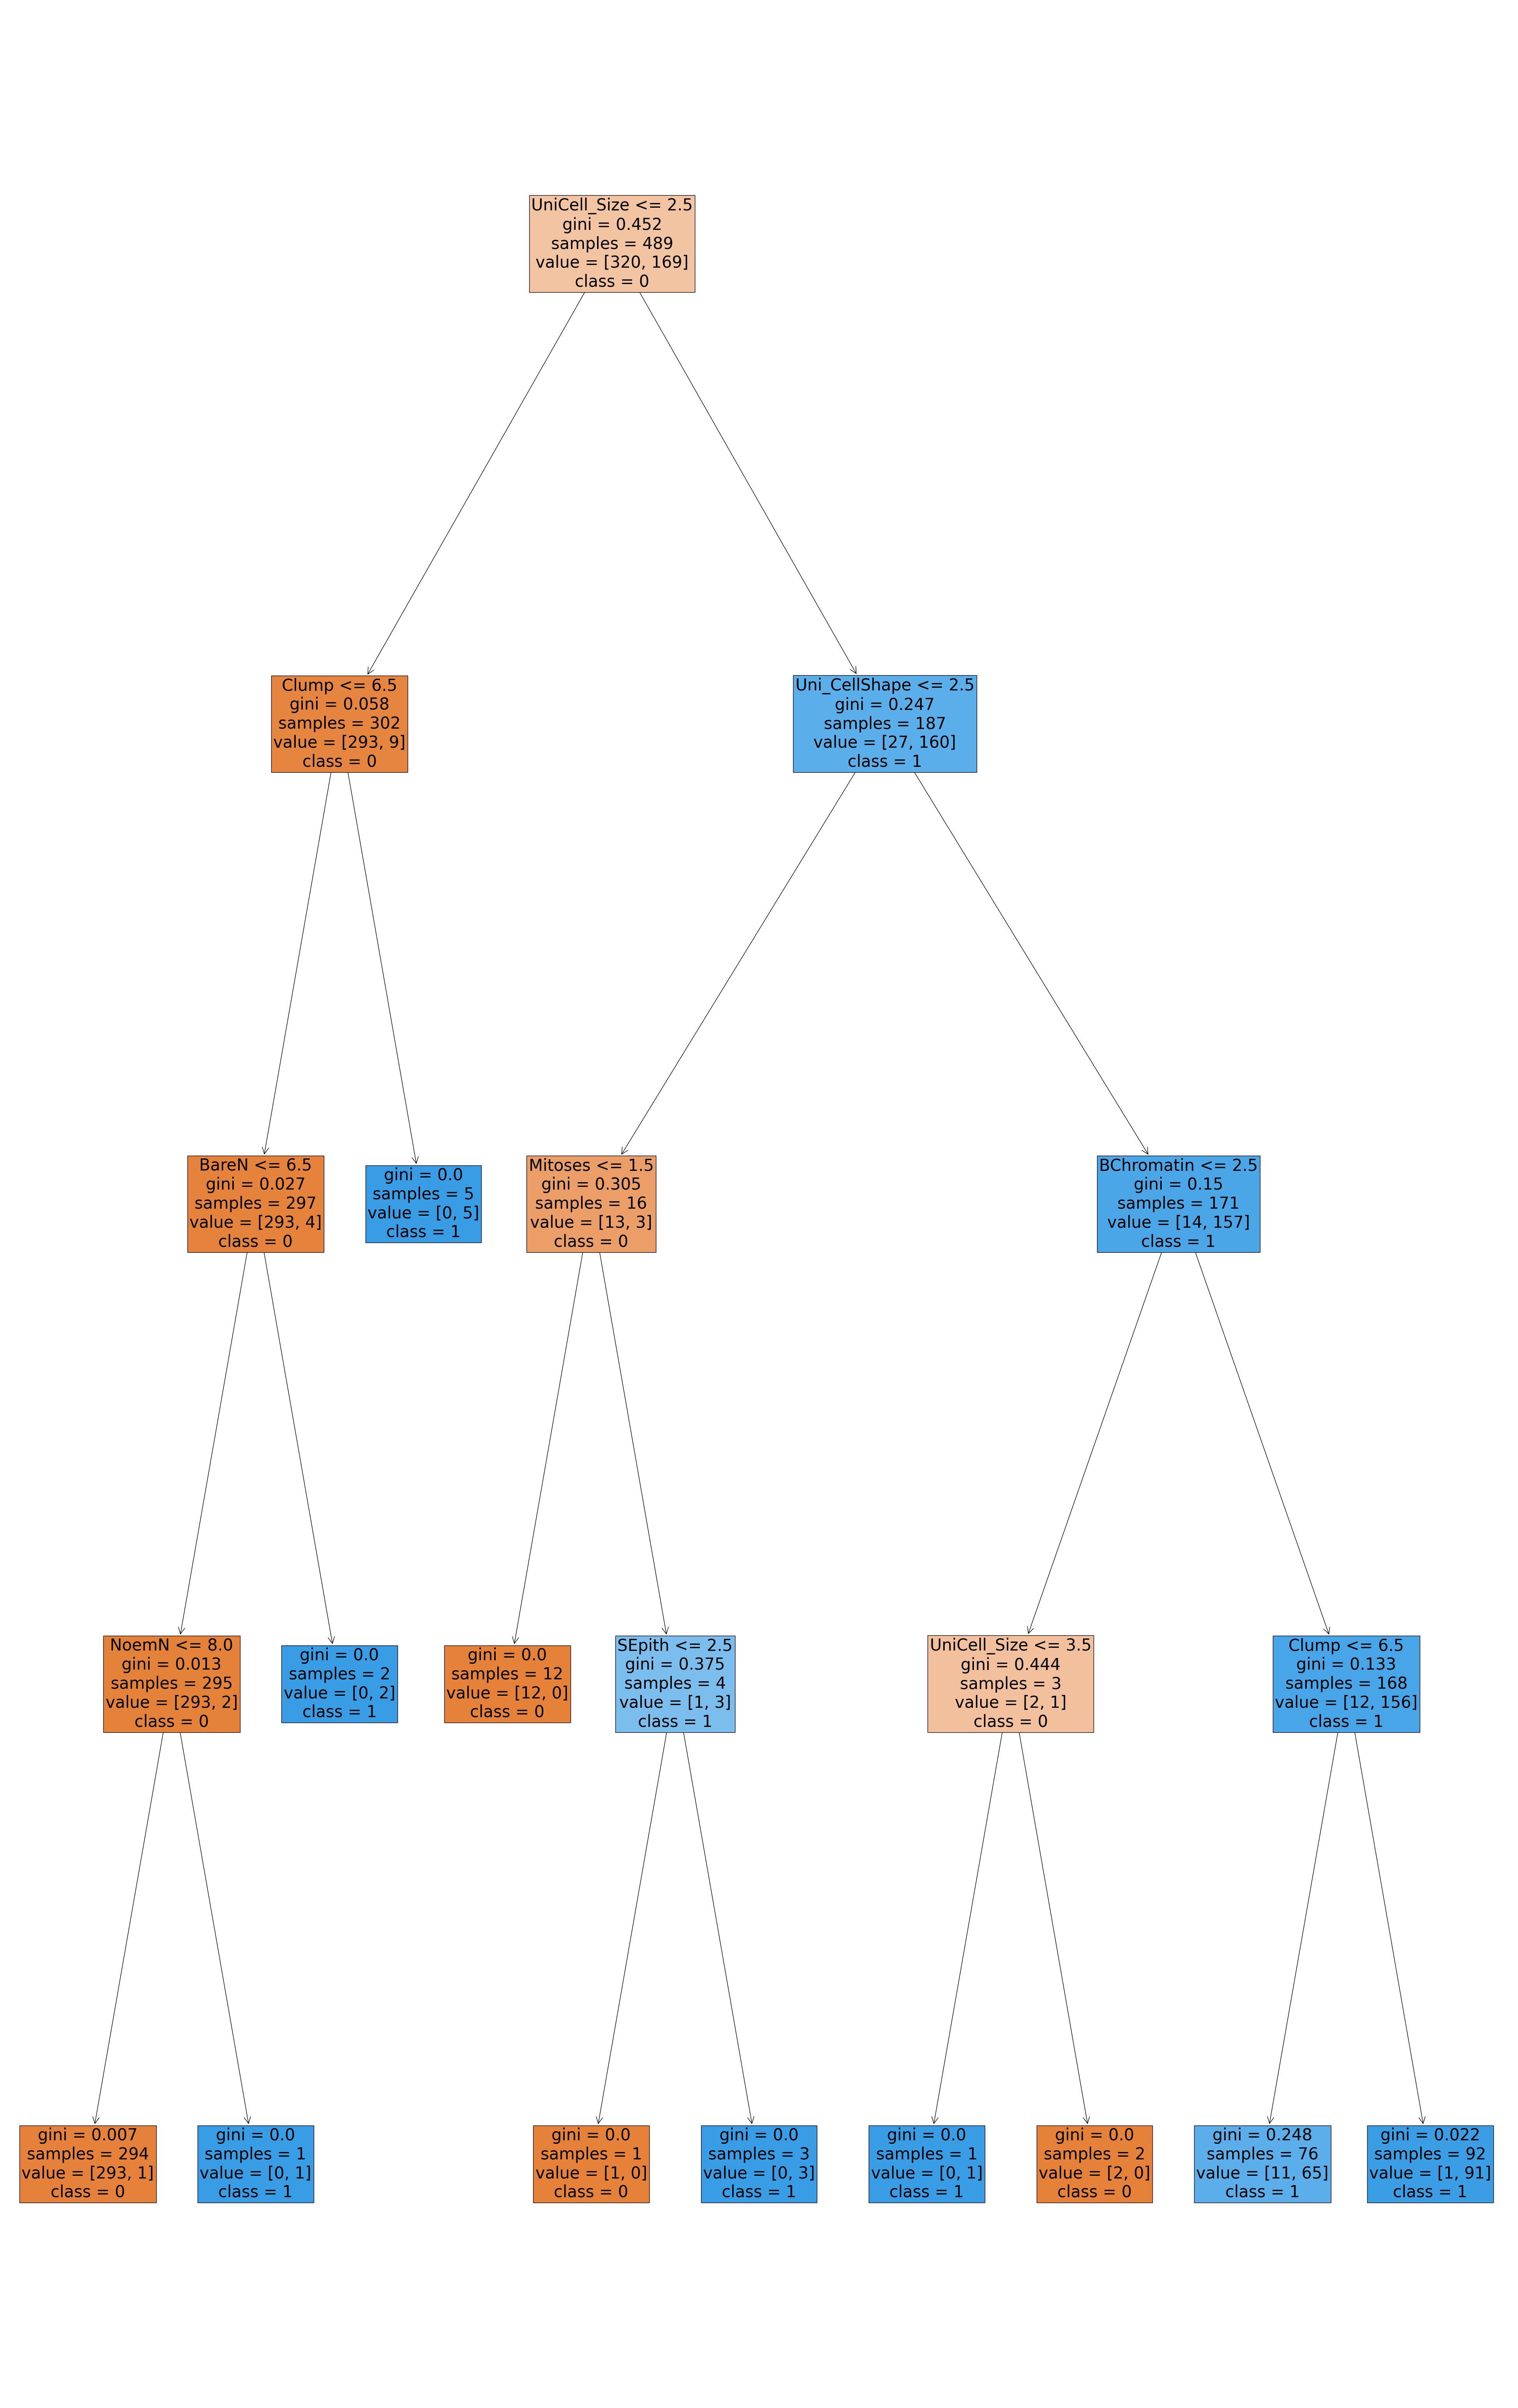

In [136]:
dtc = DecisionTreeClassifier( random_state = 24,max_depth = 4)
dtc.fit(X_train,y_train)
plt.figure(figsize=(50,80))
plot_tree(dtc,feature_names = list(X.columns),class_names = ['0','1'], filled = True, fontsize= 30)
plt.show()

In [137]:
y_pred = dtc.predict(X_test)

In [138]:
accuracy_score(y_pred,y_test)

0.9095238095238095

In [60]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]

In [61]:
roc_auc_score(y_test,y_pred_prob)

0.8663446054750403

## GridSearchCV

In [101]:
dtc = DecisionTreeClassifier( random_state = 24)
params = {'max_depth':[2,3,4,5,6,None]}

kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state =24)

In [130]:
gcv = GridSearchCV(dtc,param_grid = params, cv = kfold, scoring = 'roc_auc',verbose = 3)
gcv.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................max_depth=2;, score=0.952 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.940 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.961 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.942 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.938 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.972 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.946 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.941 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.954 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.943 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.988 total time=   0.0s
[CV 2/5] END .......................max_depth=4;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]}, scoring='roc_auc',
             verbose=3)

In [132]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=24)

In [134]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5}
0.9607632219156177


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [68]:
best_model = gcv.best_estimator_

In [69]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

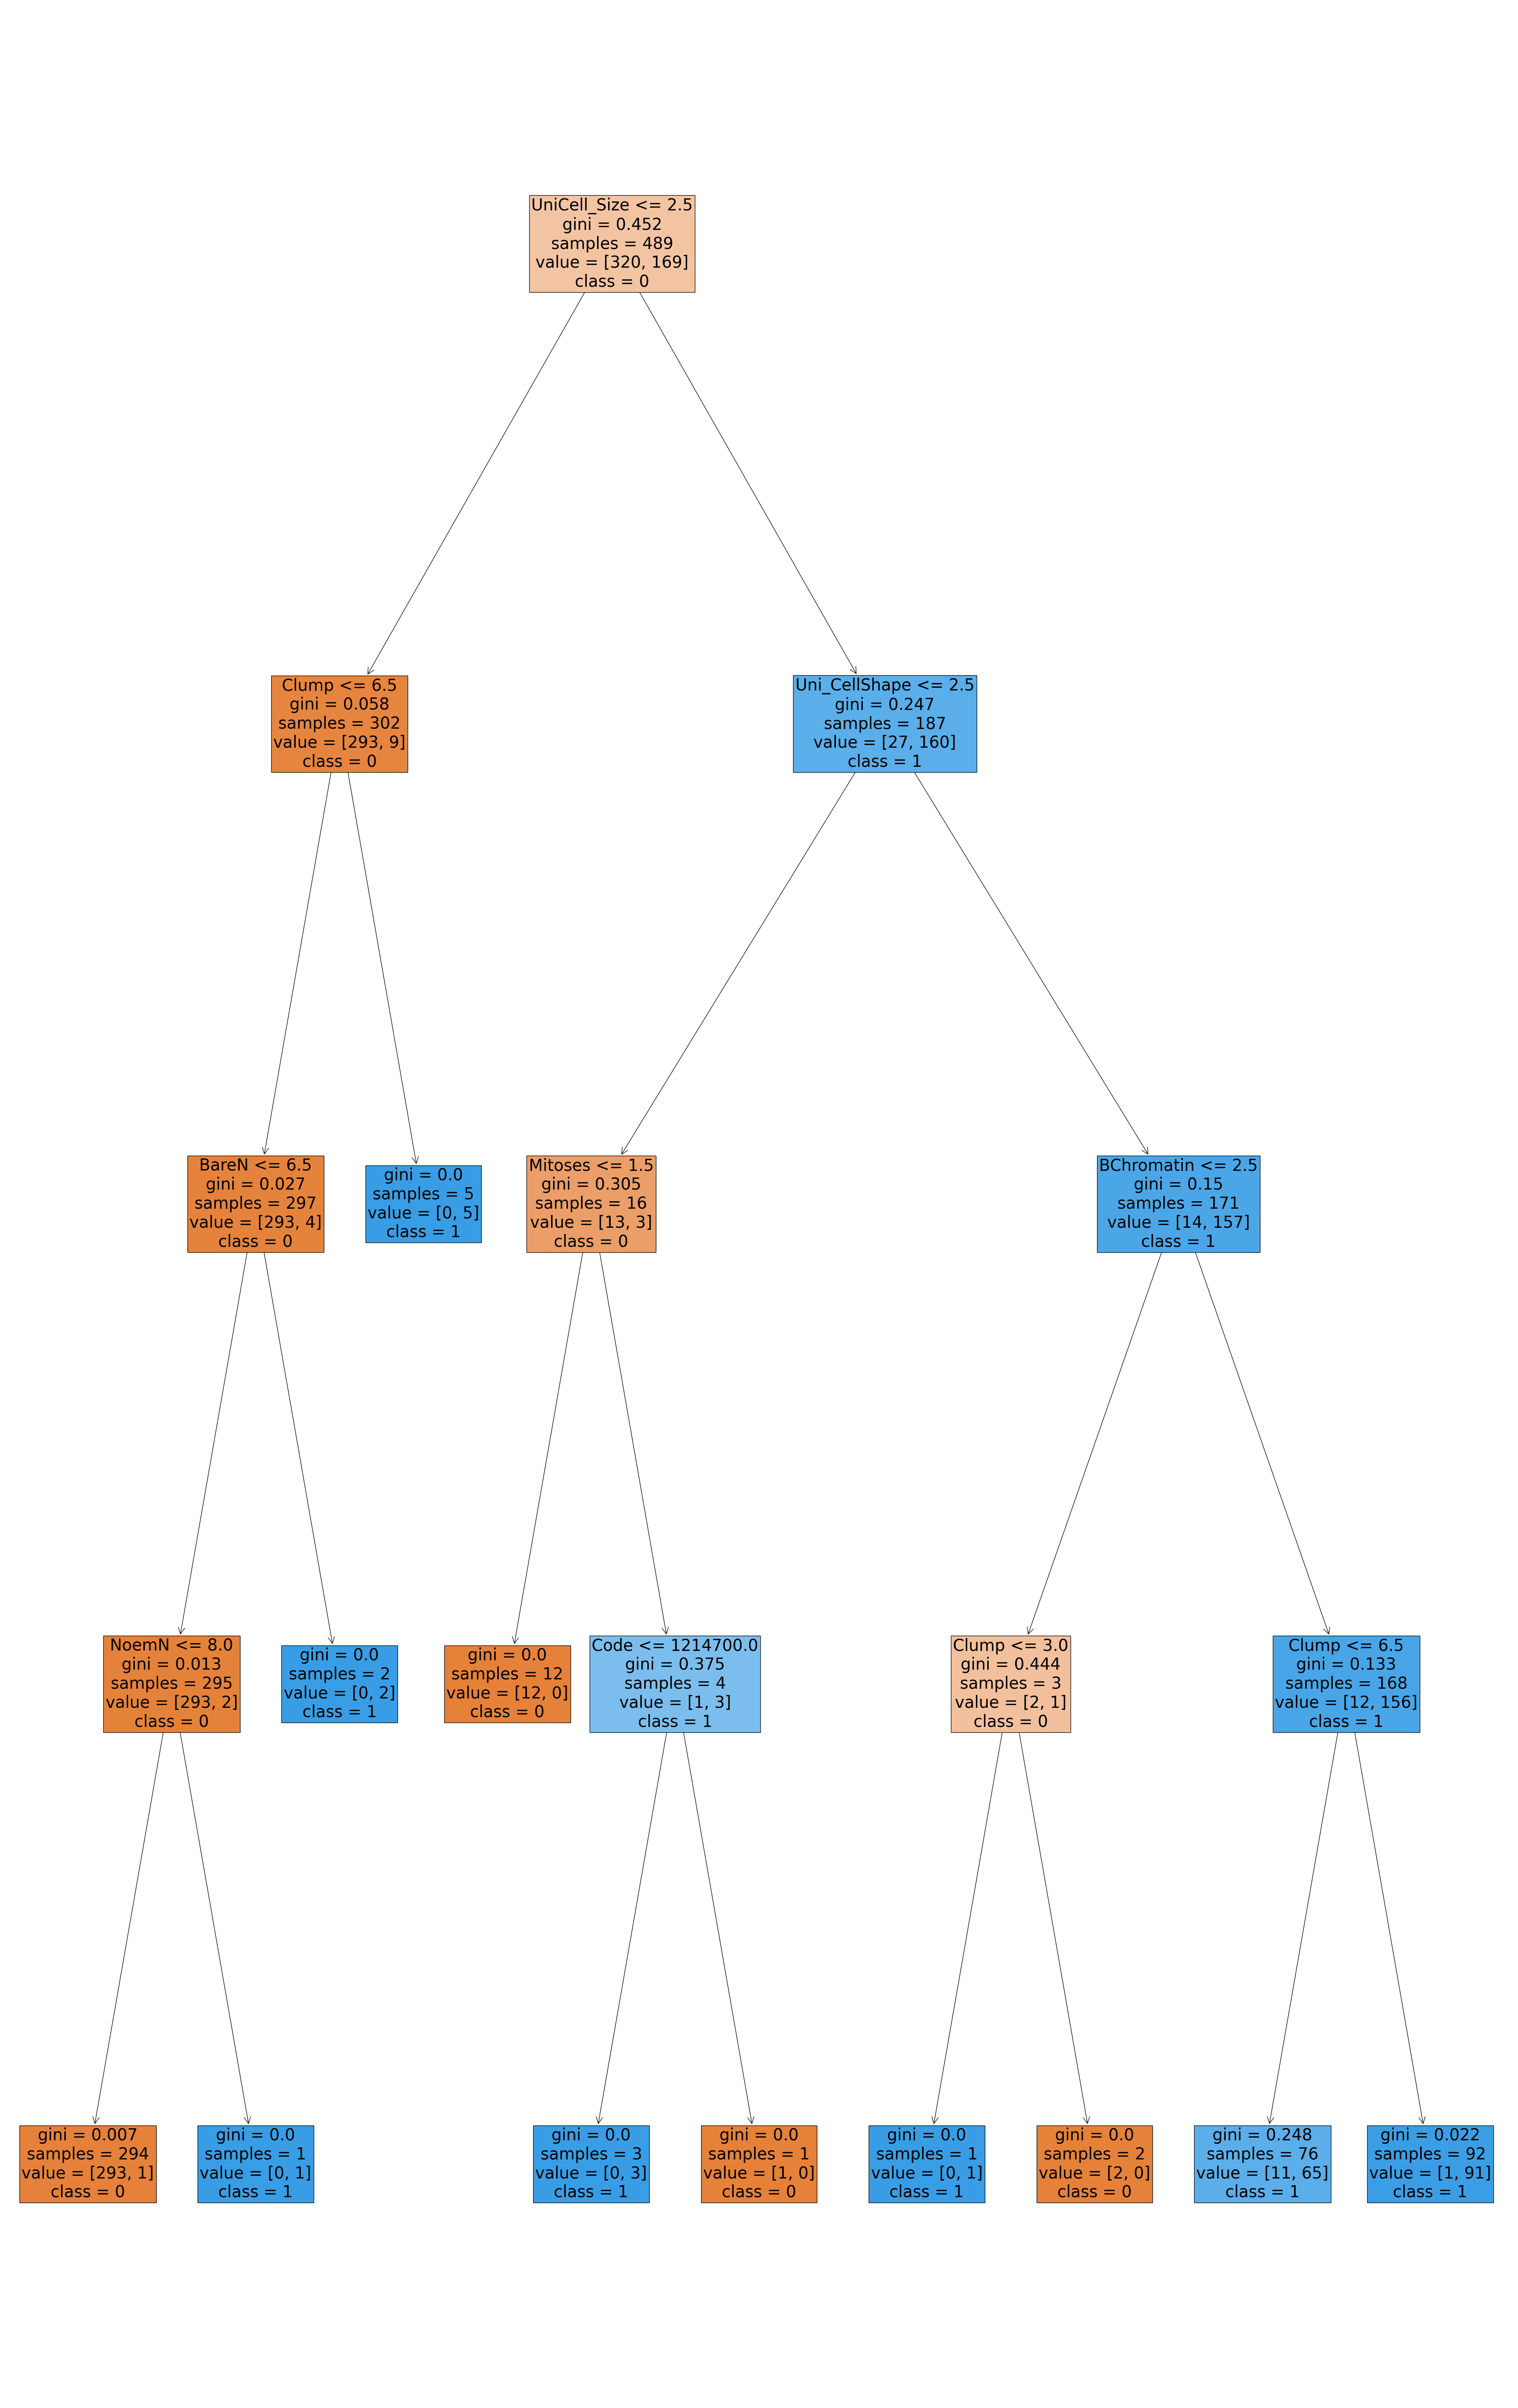

In [70]:

plt.figure(figsize=(50,80))
plot_tree(best_model,feature_names = list(X.columns),class_names = ['0','1'], filled = True, fontsize= 30)
plt.show()

In [71]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

In [72]:
best_model.feature_importances_

array([0.00756053, 0.0624818 , 0.79395275, 0.07873335, 0.        ,
       0.        , 0.01975503, 0.01052705, 0.0099783 , 0.01701119])

In [73]:
X.columns

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

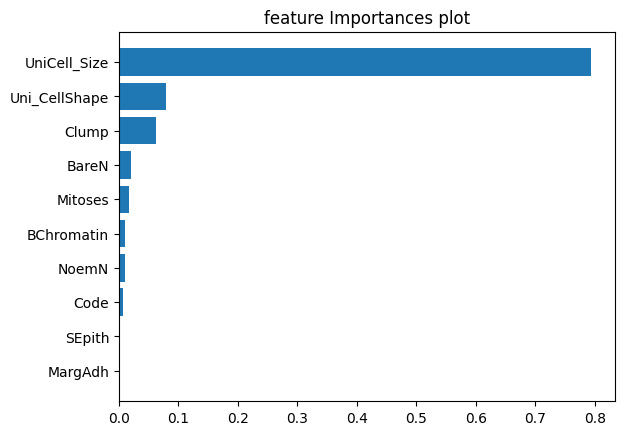

In [74]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()